In [1]:
# importing libraries
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
# load the data
irisData = load_iris()

In [3]:
# view data description and information
print(irisData.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# reading iris data to a dataframe ie only the features
df = pd.DataFrame(irisData.data)

In [5]:
# visualizing dataset
df.head()

0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2

In [6]:
# renaming columns as given in desvription
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [7]:
# reading target column into dataframe
target = pd.DataFrame(irisData.target)
target.head()

0
0  0
1  0
2  0
3  0
4  0

In [8]:
# renaming target column as given in description
target = target.rename(columns = {0: 'target'})
target.head()

target
0       0
1       0
2       0
3       0
4       0

In [9]:
# concatinating features and target variables into a single dataframe
df = pd.concat([df, target], axis = 1)
df.head()

sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0

In [10]:
# checking shape
df.shape

(150, 5)

In [11]:
# checking for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [12]:
# checking if all columns have valid datatypes
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [13]:
# checking the number of each class type
df['target'].value_counts()
# all the 3 class are balanced

0    50
1    50
2    50
Name: target, dtype: int64

In [14]:
# checking mean std etc for outliers and if scaling is required
df.describe()

sepal_length  sepal_width  petal_length  petal_width      target
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000

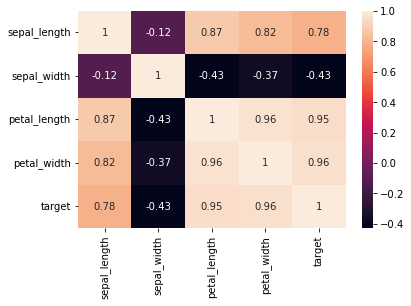

In [15]:
# checking correlation among features
sns.heatmap(df.corr(), annot = True); # annot = True adds the numbers onto the squares

# there is high correlation among petal-width and petal-length
# now target has higher correlation with petal-width
# so we can remove petal-length

In [16]:
# removing petal-length
df = df.drop(['petal_length'], axis=1)
df.head()

sepal_length  sepal_width  petal_width  target
0           5.1          3.5          0.2       0
1           4.9          3.0          0.2       0
2           4.7          3.2          0.2       0
3           4.6          3.1          0.2       0
4           5.0          3.6          0.2       0

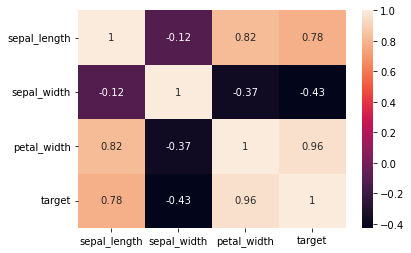

In [17]:
# checking correlation again
sns.heatmap(df.corr(), annot = True);

# high correlation among sepal-length and petal-width
# target highly correlated with petal width so remove sepal length

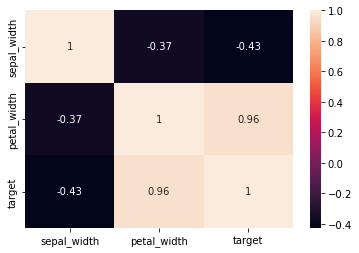

In [18]:
# removing sepal length
df = df.drop(['sepal_length'], axis=1)
sns.heatmap(df.corr(), annot = True);

<Figure size 1008x504 with 0 Axes>

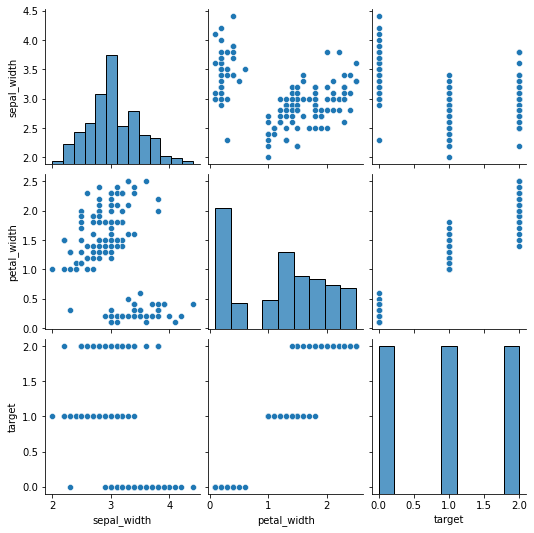

In [19]:
# observing the correlation with pairplot
plt.figure(figsize=(14, 7))
sns.pairplot(df, palette='coolwarm')
plt.show();

In [20]:
# divide our data into predictors (X) and target values (y)
X = df.copy()
y = X.pop('target')

### Hold Out Cross-Validation

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
from sklearn import neighbors

model = neighbors.KNeighborsClassifier() # creating the model instance
model.fit(X_train, y_train)  # fitting the model on the training data
predictions = model.predict(X_test) # predicting target feature for test set

hcv_score = model.score(X_test,y_test) # accuracy score of hold out cross validation
print(hcv_score)

0.9666666666666667


### Stratified 3-fold Cross-Validation

In [23]:
from sklearn.model_selection import StratifiedKFold
scv = StratifiedKFold(n_splits=3)

X1 = X.to_numpy()
y1 = y.to_numpy()
for train_index, test_index in scv.split(X1, y1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y1[train_index], y1[test_index]

TRAIN: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 133 134 135 136 137 138 139
 140

In [24]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier() # creating the model instance

In [25]:
from sklearn.model_selection import cross_val_score
scv_score = cross_val_score(model, X, y, cv = scv) # accuracy score of stratified 3 fold cross validation
scv_score = scv_score
print(scv_score)
print(np.mean(scv_score))

[1.   0.92 0.94]
0.9533333333333333


### Leave P Out Cross-Validation

In [26]:
from sklearn.model_selection import LeavePOut
lpo = LeavePOut(p=2) # setting p as 2

X2 = X.to_numpy()
y2 = y.to_numpy()
for train_index, test_index in lpo.split(X2):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X2[train_index], X2[test_index]
    y_train, y_test = y2[train_index], y2[test_index]

TRAIN: [  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149] TEST: [0 1]
TRAIN: [  1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  9

In [27]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier() # creating the model instance

In [28]:
from sklearn.model_selection import cross_val_score
lpo_score = cross_val_score(model, X, y,cv = lpo) # accuracy score of stratified 3 fold cross validation
lpo_score = lpo_score
print(lpo_score)
print(np.mean(lpo_score))

[1. 1. 1. ... 1. 1. 1.]
0.9468008948545862


### Monte Carlo Cross-Validation

In [29]:
from sklearn.model_selection import ShuffleSplit
mcv = ShuffleSplit(test_size=0.3,n_splits=10)

X3 = X.to_numpy()
y3 = y.to_numpy()

for train_index, test_index in mcv.split(X3):
     print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 60 132  29 109 112  82  14 117 145  98  69  43 126  34 123  57 121  61
  77 120 107   7 125 127 110  96 138 140 115  89  46  76  93  23  80  65
  81  26  95  35  48  38 135 101 113 119  49 128 136  33  45   6   4  87
 142 108 105 102  32 103  19   8 106  92  44  52  74  90  75   1  64  40
  10  50   0  58  78 122  11  62  16  94  28 116 146  22 104 131  79 118
  99 147  20   5 111  42  84 124   9  91 149 134   3  15  70] TEST: [133  71 100  97  39  86 137 141  13  55  17 129 114  85  37  27  83 130
  54  25  24  31 144  30  12 139  56  21   2  47  66  53  68 148  18  36
  41  51  73  88  59  67 143  63  72]
TRAIN: [  9  66  51  76 147  65  52  11 132  96  28 144 123 120 125  21  31  25
 115  57  16  86 129 133  47  37   7  48  26  55  81  73   3  67 141 137
  60  90  79  30  84  42  71  49  19  45   6  89  29  64  87 105 139 131
 114 127  15  24 100 106  38 145 130 113  62 126  72 111   0  22 122  40
 148  58  34  14  20  77 146  70  85  18  74  82  83   5  59 101 112 116
  92

In [30]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier() # creating the model instance

In [31]:
from sklearn.model_selection import cross_val_score
mcv_score = cross_val_score(model,X,y,cv = mcv) # accuracy score of monte carlo cross validation
print(mcv_score)
print(np.mean(mcv_score))

[0.97777778 0.95555556 0.93333333 0.95555556 0.91111111 1.
 0.95555556 0.97777778 0.95555556 1.        ]
0.9622222222222222


In [32]:
cv_mean_score = [round(hcv_score,2),round(np.mean(scv_score),2),
                 round(np.mean(mcv_score),2),round(np.mean(mcv_score),2)]
cv_name = ["Hold Out Cross-Validation","Stratified 3-fold Cross-Validation",
           "Leave P Out Cross-Validation","Monte Carlo Cross-Validation"]

# Create the pandas DataFrame 
df = pd.DataFrame()
df['Cross Validation Name'] = cv_name
df['Cross Validation Mean Score'] = cv_mean_score
df

Cross Validation Name  Cross Validation Mean Score
0           Hold Out Cross-Validation                         0.97
1  Stratified 3-fold Cross-Validation                         0.95
2        Leave P Out Cross-Validation                         0.96
3        Monte Carlo Cross-Validation                         0.96

1. Hold Out cross validation splits the entire dataset randomly into a training set and a test set. Since the dataset is split into two sets, the model is built just once but the execution is faster.

2. Stratified cross validation is an enhanced version of the k-fold cross-validation technique. Hee each fold has the same ratio of target feature. Thus its perfect for imbalanced datasets

3. Leave P out cross validation an exhaustive and  computationally heavy cross validation technique. Here for n samples p samples are used as the test set and n-p samples are used as the training set. This process is repeated untill the entire dataset containing n samples gets divided on the test set of p samples and the training set of n-p samples. This continues till all samples are used as a test set. Its not considered ideal for imbalanced dataset because if the training set has all samples of one class, the model will not be able to generalize and will become biased to either of the classes.

4. Monte Carlo cross validation involves splitting the whole dataset into training and test set. For each iteration the train-test split percentage is kept different. Then the model is fit on the training data and this is repeated for many iterations.

1. Since our dataset is balanced we can rule out Stratified cross validation.
2. Leave P out cross validation will be appropriate for small datasets. As our dataset is of a moderate size we might consider this as the best cross validation as the cv_score is also high but it might lead to imbalace split of classes. So rule out this as well.
3. Both monte carlo and hold out cross validation may be suited for this dataset but since monte carlo performs repeated iterations on different train test splits as opposed to just 1 train test split in holdout cross validation which can lead to overfitting; so I will prefer monte carlo cross validation for this dataset 